In [1]:
# prompt: mount drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
%load_ext rpy2.ipython


In [18]:
.libPaths(c("/content/drive/MyDrive/Colab Notebooks/R_lib", .libPaths()))
library(dplyr)
library(pheatmap)
library(RColorBrewer)
library(limma)
library(dplyr)
library(UpSetR)
library(ggplotify)
library(gridExtra)
library(VennDiagram)
library(GSEABase)

Loading required package: grid

Loading required package: futile.logger

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following object is masked from ‘package:gridExtra’:

    combine


The following object is masked from ‘package:limma’:

    plotMA


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: Biobase

Welcome to Bioconductor

    Vignett

In [3]:
study_names <- c("HP_Infection", "HP_Gastritis", "HP_Atrophy", "Gastric_Cancer")

DEGs_list <- lapply(file_names, function(file) {
  scan(file, what = character(), sep = "\n")
})

names(DEGs_list) <- study_names

str(DEGs_list)
DEGs_lengths <- sapply(DEGs_list, length)
DEGs_lengths

List of 4
 $ HP_Infection  : chr [1:747] "C4orf7" "CD180" "CD19" "LCN2" ...
 $ HP_Gastritis  : chr [1:4035] "CXCL2" "CCL20" "CXCL5" "CXCL1" ...
 $ HP_Atrophy    : chr [1:8145] "GLRX" "ESPL1" "RNF186" "BRWD3" ...
 $ Gastric_Cancer: chr [1:8406] "COL10A1" "CST1" "ESM1" "ASAH2" ...


HP_Infection   HP_Gastritis     HP_Atrophy Gastric_Cancer 
           747           4035           8145           8406

In [4]:
# common DEGs across all studies
common_DEGs_HP_DiseaeSignature <- Reduce(intersect, DEGs_list)
length(common_DEGs_HP_DiseaeSignature)
common_DEGs_HP_DiseaeSignature
cat(common_DEGs_HP_DiseaeSignature, sep = ", ")

[1] 43

[1] "CCL20"      "CXCL1"      "PIGR"       "PLA2G7"     "PNOC"      
 [6] "IFI30"      "C2"         "EAF2"       "SAA1"       "SLC28A3"   
[11] "ITGAX"      "FCGR3A"     "GBP5"       "CCL3"       "PIM2"      
[16] "CCR9"       "TNFRSF25"   "PRDM1"      "SAA2"       "LGALS2"    
[21] "TNFRSF11B"  "CACNG7"     "SLC37A2"    "GLRX"       "TEF"       
[26] "IGLL1"      "CXCL14"     "SRMS"       "ABHD6"      "LAIR2"     
[31] "CCL3L3"     "ASB2"       "FGL2"       "CCR10"      "CD80"      
[36] "DAPP1"      "FAM3D"      "PER3"       "CCL28"      "SERPINA3"  
[41] "ST6GALNAC2" "STAC3"      "IL23A"

CCL20, CXCL1, PIGR, PLA2G7, PNOC, IFI30, C2, EAF2, SAA1, SLC28A3, ITGAX, FCGR3A, GBP5, CCL3, PIM2, CCR9, TNFRSF25, PRDM1, SAA2, LGALS2, TNFRSF11B, CACNG7, SLC37A2, GLRX, TEF, IGLL1, CXCL14, SRMS, ABHD6, LAIR2, CCL3L3, ASB2, FGL2, CCR10, CD80, DAPP1, FAM3D, PER3, CCL28, SERPINA3, ST6GALNAC2, STAC3, IL23A

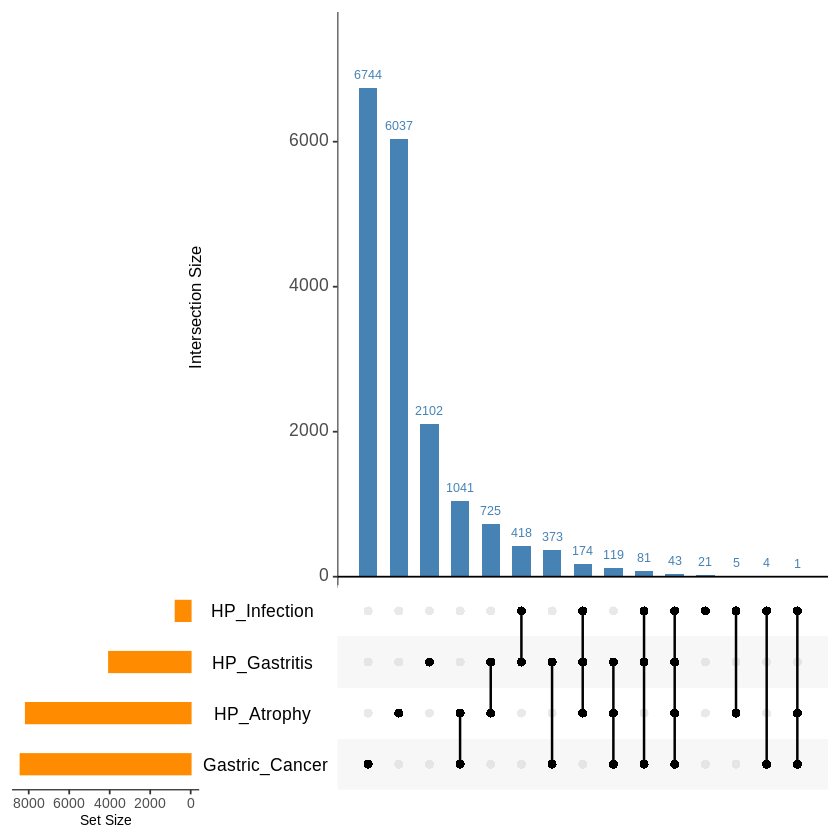

In [15]:
# Convert the list into a binary matrix format
deg_matrix <- fromList(DEGs_list)

# Plot the UpSet plot
upset(
  deg_matrix,
  sets = study_names,
  order.by = "freq",
  main.bar.color = "steelblue",
  matrix.color = "black",
  sets.bar.color = "darkorange",
  mainbar.y.label = "Intersection Size",
  sets.x.label = "Set Size",
  text.scale = c(1.2, 1.5, 1, 1.2, 1.5, 1.2)
)

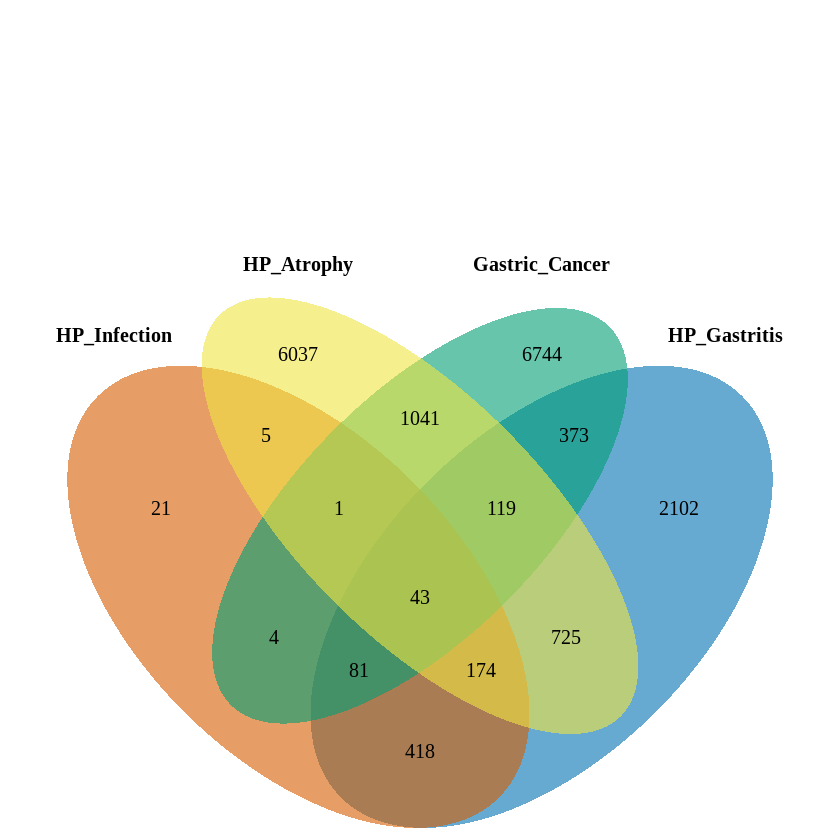

In [19]:
venn.plot = venn.diagram(
  DEGs_list,
  filename = NULL,
  main = "",
  main.fontface = "bold",
  main.cex = 2,
  sub = "",
  sub.cex = 1,
  sub.fontface = "italic",
  col = c("#D55E00", "#0072B2", "#F0E442", "#009E73"),
  fill = c("#D55E00", "#0072B2", "#F0E442", "#009E73"),
  alpha = 0.6,
  lty = "blank",
  cex = 1,
  cat.cex = 1,
  cat.fontface = "bold",
  cat.default.pos = "text",
  margin = 0.1
)

grid.newpage()
grid.draw(venn.plot)